In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [3]:
def notEmpty(s):
    return s != ''

In [20]:
names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 
    'LSTAT'
]
path = "datas/zhengqi_train.txt"
# 由于数据文件格式不统一,所以读取的时候,
# 先按照一行一个字段属性读取数据,然后再按照每行数据进行处理
fd = pd.read_csv(path, sep='\s+', header=0)
x, y = np.split(fd, (38,), axis=1)

In [21]:
# 查看数据信息
X_DF = pd.DataFrame(x)
X_DF.info()
X_DF.describe().T
X_DF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 38 columns):
V0     2888 non-null float64
V1     2888 non-null float64
V2     2888 non-null float64
V3     2888 non-null float64
V4     2888 non-null float64
V5     2888 non-null float64
V6     2888 non-null float64
V7     2888 non-null float64
V8     2888 non-null float64
V9     2888 non-null float64
V10    2888 non-null float64
V11    2888 non-null float64
V12    2888 non-null float64
V13    2888 non-null float64
V14    2888 non-null float64
V15    2888 non-null float64
V16    2888 non-null float64
V17    2888 non-null float64
V18    2888 non-null float64
V19    2888 non-null float64
V20    2888 non-null float64
V21    2888 non-null float64
V22    2888 non-null float64
V23    2888 non-null float64
V24    2888 non-null float64
V25    2888 non-null float64
V26    2888 non-null float64
V27    2888 non-null float64
V28    2888 non-null float64
V29    2888 non-null float64
V30    2888 non-null fl

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028


In [23]:
# 数据的分割,
x_train, x_test, y_train, y_test = train_test_split(
    x,y, 
    train_size=0.8, 
    random_state=14
)
print(
    "训练数据集样本数目:%d, 测试数据集样本数目:%d" 
    % 
    (x_train.shape[0], x_test.shape[0])
)

训练数据集样本数目:2310, 测试数据集样本数目:578


In [24]:
# XGBoost将数据转换为XGBoost可用的数据类型
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

In [25]:
dtrain.num_col()

38

In [26]:
dtrain.num_row()

2310

In [27]:
dtest.num_row()

578

In [28]:
dtest.num_col()

38

In [29]:
# XGBoost模型构建
# 1. 参数构建
params = {
    'max_depth': 6, 
    'eta':0.3, 
    'silent':1, 
    'objective':'reg:linear'
}
num_round = 2
# 2. 模型训练
bst = xgb.train(params, dtrain, num_round)
# 3. 模型保存
bst.save_model('xgb.model')

In [30]:
# XGBoost模型预测
y_pred = bst.predict(dtest)
print(mean_squared_error(y_pred, y_test))

0.36529016557729027


In [33]:
# 4. 加载模型
bst2 = xgb.Booster()
bst2.load_model('xgb.model')
# 5 使用加载模型预测
y_pred2 = bst2.predict(dtest)
print('mean_squared_error = %f' % mean_squared_error(y_pred2, y_test))

mean_squared_error = 968.652027


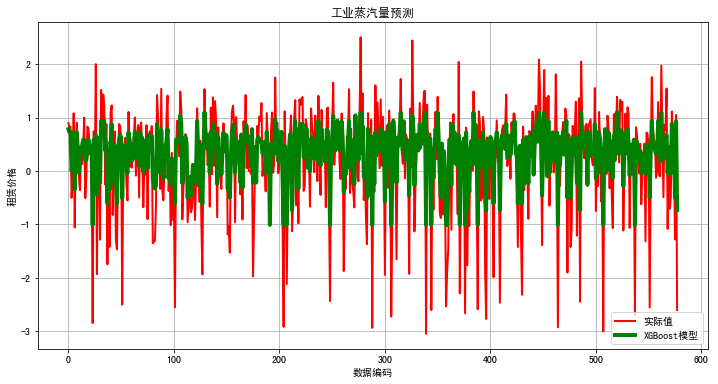

In [34]:
# 画图
# 7. 画图 
plt.figure(figsize=(12, 6), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'实际值')
plt.plot(ln_x_test, y_pred, 'g-', lw=4, label=u'XGBoost模型')

plt.xlabel(u'数据编码')
plt.ylabel(u'租赁价格')

plt.legend(loc='lower right')
plt.grid(True)
plt.title(u'工业蒸汽量预测')
plt.show()

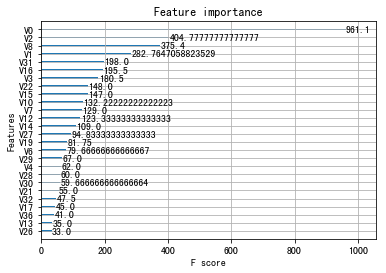

In [35]:
from xgboost import plot_importance
from matplotlib import pyplot

# 找出最重要的特征
plot_importance(bst, importance_type = 'cover')
pyplot.show()